# ------------ Netflix -----------

## Objective

### Q1: What is the most frequent genre in the dataset?

### Q2: What genres has highest votes ?

### Q3: What movie got the highest popularity ? what's its genre ?

### Q4: What movie got the lowest popularity ? what's its genre ?

### Q5: Which year has the most filmmed movies?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [ ]:
df=pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [ ]:
df.head(20)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
# check duplicate
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9822,False
9823,False
9824,False
9825,False


In [ ]:
# duplicate check another process
df.duplicated().sum()

np.int64(0)

In [ ]:
# convert the 'release_date' data type object into datetime
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [ ]:
print(df['Release_Date'].dtypes)

datetime64[ns]


In [ ]:
# we just keep the years of the 'release_date' column
df['Release_Date']=df['Release_Date'].dt.year
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [ ]:
# remove the unwanted columns
drop_columns=['Overview','Original_Language','Poster_Url']
for i in drop_columns:
  if i in df.columns:
    df.drop(i, axis=1, inplace=True)

# another process
# df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


## categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular, average,
below_avg, not_popular to describe it more using catigorize_col() function
provided above.

In [ ]:
def catigorize_col (df, col, labels):
  # setting the edges to cut the column accordingly
  edges = [df[col].describe()['min'],
  df[col].describe()['25%'],
  df[col].describe()['50%'],
  df[col].describe()['75%'],
  df[col].describe()['max']]

  df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
  return df

In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [ ]:
# check NaN is present or not
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,100
Genre,0


In [ ]:
# drop the NaN
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [ ]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [ ]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama


In [ ]:
df.dtypes

,0
Release_Date,int32
Title,object
Popularity,float64
Vote_Count,int64
Vote_Average,category
Genre,object


In [ ]:
df['Genre']=df['Genre'].astype('category')

In [ ]:
df.dtypes

,0
Release_Date,int32
Title,object
Popularity,float64
Vote_Count,int64
Vote_Average,category
Genre,category


In [ ]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


In [ ]:
sns.set_style('whitegrid')

### Q1: What is the most frequent genre in the dataset?

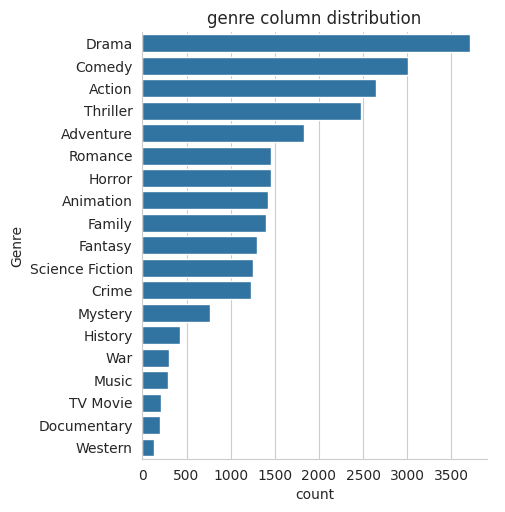

In [ ]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index)
plt.title('genre column distribution')
plt.show()

### Q2: What genres has highest votes ?

In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
average,6613
popular,6520
below_avg,6348
not_popular,6071


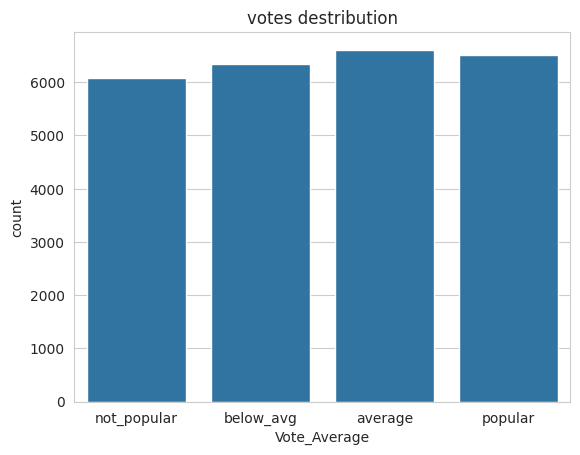

In [ ]:
sns.countplot(x=df.Vote_Average)
plt.title('votes destribution')
plt.show()

### Q3: What movie got the highest popularity ? what's its genre ?

In [ ]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Q4: What movie got the lowest popularity ? what's its genre ?

In [ ]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### Q5: Which year has the most filmmed movies?

In [ ]:
df['Release_Date'].value_counts()

,count
Release_Date,
2021,1636
2018,1384
2017,1365
2019,1271
2016,1209
...,...
1920,4
1902,3
1925,2


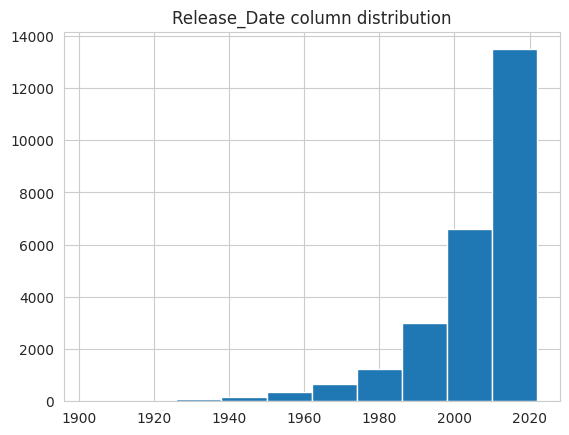

In [ ]:
df['Release_Date'].hist(bins=10)
plt.title('Release_Date column distribution')
plt.show()

# Summery :

## Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
## Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
## Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .
## Q4: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.
## Q5: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.
